<a href="https://colab.research.google.com/github/asad123asad/AI-models/blob/main/data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

steps
#(1) gathering data (what to clean) dataset
#(2)tools to clean data (kis se clean karna he) libraries
# (3) how to do, (kesa karna he) 'steps'

In [33]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
df.shape

(891, 15)

In [36]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [38]:
#finding null values
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [39]:
# for cleaning we have to remove deck
df.drop(columns='deck',inplace=True)
# inplace true will remove the deck from original data(df)

In [40]:
#filling missing values of age with mean of ages
df['age']=df.age.fillna(value=df['age'].mean())


In [41]:
# here we use mode because embarked is categorial value
#we use 0 with mode, beuase have alot of modes but we replace with 1st mode
df['embarked']=df.embarked.fillna(value=df['embarked'].mode()[0])

In [42]:
df['embark_town']=df.embark_town.fillna(value=df['embark_town'].mode()[0])

In [43]:
#here we don't have any null value
df.isnull().sum()/len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

<Axes: xlabel='sex', ylabel='age'>

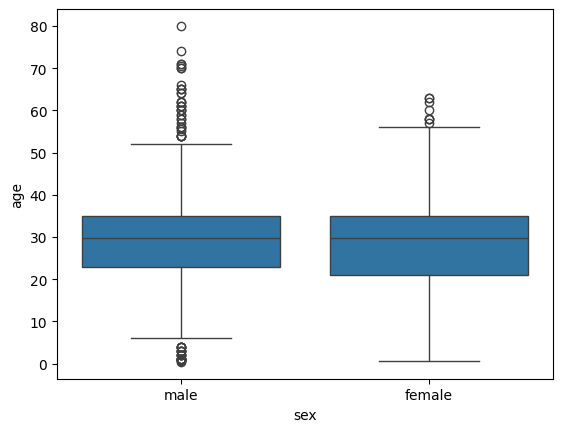

In [44]:
#outliers removal visualization method
import seaborn as sns
sns.boxplot(data=df, y='age', x='sex')

In [45]:
#outliers removal IQR (inter Quartile range removal) methon
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[( df ['age'] > lower_bound ) & (df ['age'] < upper_bound )]

In [46]:
#removing outliers of fare
#outliers removal IQR (inter Quartile range removal) methon
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[( df ['fare'] > lower_bound ) & (df ['fare'] < upper_bound )]

In [47]:
#we had  891 but now we have only 718 rows (only age outliers removed )
df.shape


(718, 14)

In [ ]:
#Zscore mthod for outliers removal we neended liberary scipy
!pip install scipy
import scipy
from scipy import stats
import numpy as np
zscore=np.abs(stats.zscore(df['age']))
threshold=3
df=[df( zscore < threshold).all(axis=1)]

# finding and dropping duplicates

In [49]:
#finding duplicates
df.duplicated().sum()

103

In [50]:
#extra to see duplicates
df_duplicates=df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [51]:
df_duplicates.shape

(103, 14)

<ipython-input-52-f7271f65e32b>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.duplicates=df.duplicated()


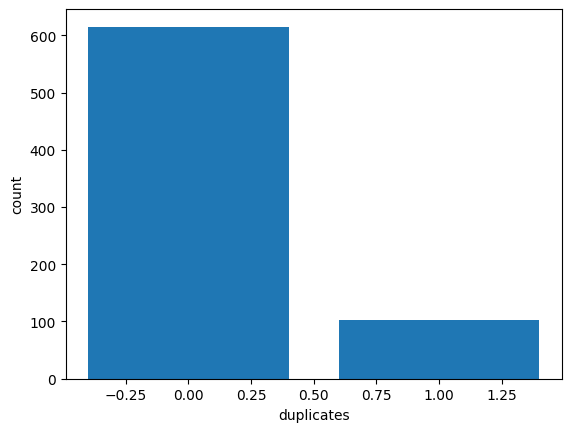

In [52]:
#this is extra only to see or visualize the duplicates
df.duplicates=df.duplicated()
df_duplicates_count=df.duplicates.value_counts()

#making bar plot
plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.xlabel("duplicates")
plt.ylabel("count")
plt.show()

In [53]:
#dropping duplicated
df.drop_duplicates(inplace=True)

In [54]:
df.shape

(615, 14)

# **data normalization**
to bring data at one scale


In [55]:
# 1 import libraries
!pip install scikit-learn
import sklearn
import pandas as pd



In [56]:
from sklearn.preprocessing import MinMaxScaler
# 2 select columns to normalize
#only select numric variables
cols_to_normalize=["age","fare"]

# 3 create the scaler function/tool
scaler=MinMaxScaler()

# 4 fit and transform data on scale
# or df["age","fare"]
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

#check data
df.describe()



,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [57]:
#2nd method data normalization (standardScaler)
from sklearn.preprocessing import StandardScaler
# 2 select columns to normalize
#only select numric variables
cols_to_normalize=["age","fare"]

# 3 create the scaler function/tool
scaler=StandardScaler()

# 4 fit and transform data on scale
# or df["age","fare"]
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

#check data
df.describe()

# x_standard=(x - mean(x))/std(x)
 #where
# x_stand is standarizez varialbel
# x is a original variable
# mean(x) mean of variable x
# std(x)  standard deviation of x

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,6.150000e+02,615.000000,615.000000,6.150000e+02
mean,0.360976,2.469919,3.061688e-16,0.460163,0.365854,-1.213122e-16
std,0.480674,0.741063,1.000814e+00,0.894039,0.835572,1.000814e+00
min,0.000000,1.000000,-2.377209e+00,0.000000,0.000000,-1.351236e+00
25%,0.000000,2.000000,-5.973545e-01,0.000000,0.000000,-7.695610e-01
50%,0.000000,3.000000,1.238725e-01,0.000000,0.000000,-3.935399e-01
75%,1.000000,3.000000,5.267644e-01,1.000000,0.000000,5.641565e-01
max,1.000000,3.000000,2.400296e+00,5.000000,6.000000,3.170505e+00


# **log transformation method**

In [58]:
# log transformation method
kashti=sns.load_dataset("titanic")
kashti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [59]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
import numpy as np
kashti["age"]=kashti["age"].fillna(kashti['age'].mean())
kashti["fare"]=kashti["fare"].fillna(kashti['fare'].mean())

#log transform
#kashti["age"]=np.log1p(kashti['age']) ager age ki values ziyada zero ke qareeb hongi to esa karenga
kashti["age"]=np.log(kashti['age'])
kashti["fare"]=np.log(kashti['fare'])
kashti.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

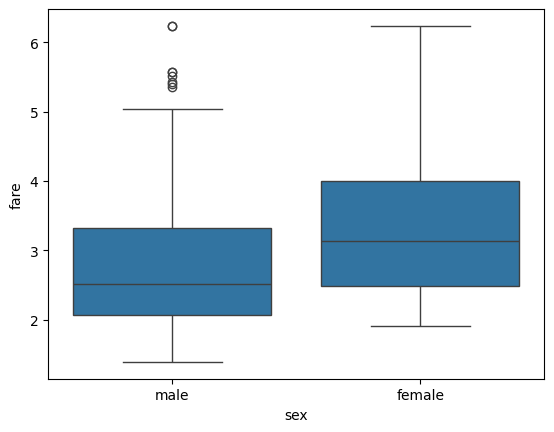

In [61]:
sns.boxplot(data=kashti, x="sex", y='fare')

<Axes: xlabel='age', ylabel='Count'>

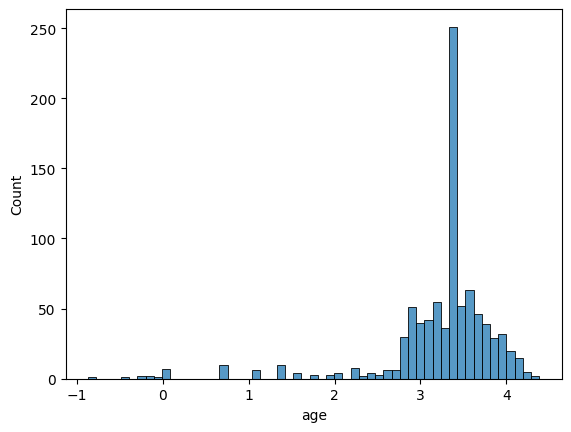

In [62]:
sns.histplot(kashti['age'])

# **Organizing the data**

In [63]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [64]:
#makimg new column  of family size
df['family_size']=df['sibsp'] + df['parch']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


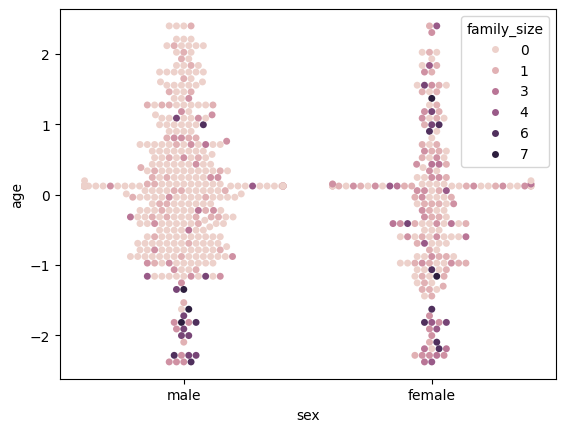

In [65]:
sns.swarmplot(data=df, x='sex', y='age', hue='family_size')

In [66]:
df=df.rename(columns={'survived': 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [67]:
#data dakh rahy hen isme ham
table=pd.pivot_table(df, values='fare', index='sex',
columns='survival', aggfunc=np.sum) #  ager ham sum ki jagha mean likhde to phr pclass fare ka mean ajaega
table

survival,0,1
sex,,
female,-3.793513,43.327331
male,-59.851567,20.317749


<Axes: xlabel='fare', ylabel='age'>

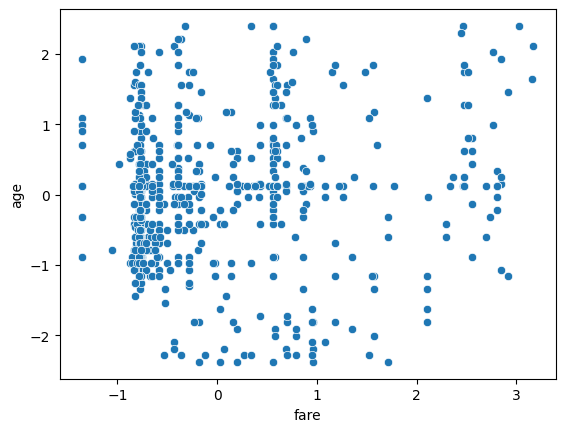

In [68]:
sns.scatterplot(data=df, x='fare', y='age')

In [69]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False,1
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True,0


In [70]:
#saving the wrangled data
#this csv file is ready to use for ML
df.to_csv("pre_processed_data.csv")
print(df)

     survival  pclass     sex       age  sibsp  parch      fare embarked  \
0           0       3    male -0.597354      1      0 -0.817136        S   
2           1       3  female -0.222648      0      0 -0.767410        S   
3           1       1  female  0.620441      1      0  2.560585        S   
4           0       3    male  0.620441      0      0 -0.758201        S   
5           0       3    male  0.123872      0      0 -0.728122        Q   
..        ...     ...     ...       ...    ...    ...       ...      ...   
885         0       3  female  0.995147      0      5  0.794372        Q   
887         1       1  female -0.878384      0      0  0.858832        S   
888         0       3  female  0.123872      1      2  0.376301        S   
889         1       1    male -0.222648      0      0  0.858832        C   
890         0       3    male  0.339411      0      0 -0.780302        Q   

     class    who  adult_male  embark_town alive  alone  family_size  
0    Third    ma